4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
Classes:  10


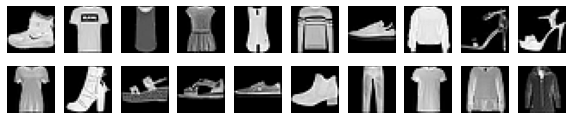

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')
    
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em 
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

In [13]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import add

def residual_block(layer_in, n_filters):
    merge_input = layer_in
    #verifica se é necessária uma primeira camada para deixar o número de filtros iguais para adição
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv1
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv2
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    # soma entrada com saída (pulou 2 camadas)
    layer_out = add([conv2, merge_input])
    # função de ativação da saída do bloco
    layer_out = keras.layers.Activation('relu')(layer_out)
    return layer_out

input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=input_shape)(input_layer)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(conv1)
layer1 = residual_block(pool1, 64)
pool2 = MaxPooling2D(2, strides=2, padding='same')(layer1)
layer2 = residual_block(pool2, 64)
layer3 = keras.layers.GlobalAveragePooling2D()(layer2)
softmax = keras.layers.Dense(num_classes, activation='softmax')(layer3)

Modelo = keras.models.Model(inputs=input_layer, outputs=softmax)
Modelo.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 26, 26, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 13, 13, 32)   0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 13, 13, 64)   18496       max_pooling2d_5[0][0]            
____________________________________________________________________________________________

In [14]:
x_train2 = x_train[:800]
y_trains2 = y_train[:800]
x_test2 = x_test[800:1800]
y_test2 = y_test[800:1800]
batch_size = 32
epochs = 10

In [34]:
for i in range(1,6):
  print(i)


a.append(0.95)
a
np.mean(a)

1
2
3
4
5


0.9181500047445297

In [35]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
a=[]

for i in range(1,6):
  seed(i)
  set_seed(i)

  Modelo.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                metrics=['accuracy'])

  final = Modelo.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs, verbose=1)
  a.append(Modelo.evaluate(x_test, y_test, verbose = 0)[1])

print(a)
print("Acurácia media para learning_rate=0.0005: %.4f" % (np.mean(a)))


Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2200 - accuracy: 0.9199
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1866 - accuracy: 0.9305
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1697 - accuracy: 0.9362
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1570 - accuracy: 0.9412
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1464 - accuracy: 0.9450
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1371 - accuracy: 0.9492
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1284 - accuracy: 0.9523
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1200 - accuracy: 0.9559
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1121 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [36]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
a=[]

for i in range(1,6):
  seed(i)
  set_seed(i)

  Modelo.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

  final = Modelo.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs, verbose=1)
  a.append(Modelo.evaluate(x_test, y_test, verbose = 0)[1])

print(a)
print("Acurácia media para learning_rate=0.001: %.4f" % (np.mean(a)))



Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [37]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
a=[]

for i in range(1,6):
  seed(i)
  set_seed(i)

  Modelo.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.005),
                metrics=['accuracy'])

  final = Modelo.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs, verbose=1)
  a.append(Modelo.evaluate(x_test, y_test, verbose = 0)[1])

print(a)
print("Acurácia media para learning_rate=0.005: %.4f" % (np.mean(a)))


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2180 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1462 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1432 - accuracy: 0.9546
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1396 - accuracy: 0.9526
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1422 - accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1392 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1285 - accuracy: 0.9544
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1332 - accuracy: 0.9524
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1267 - accuracy: 0.9551
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [38]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
a=[]

for i in range(1,6):
  seed(i)
  set_seed(i)

  Modelo.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

  final = Modelo.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs, verbose=1)
  a.append(Modelo.evaluate(x_test, y_test, verbose = 0)[1])

print(a)
print("Acurácia media para learning_rate=0.01: %.4f" % (np.mean(a)))


Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2873 - accuracy: 0.9184
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2918 - accuracy: 0.9067
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2946 - accuracy: 0.9009
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2940 - accuracy: 0.8993
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3167 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2930 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3052 - accuracy: 0.8934
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2890 - accuracy: 0.8985
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3114 - accuracy: 0.8927
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [27]:
Modelo.evaluate(x_test, y_test, verbose = 0)[1]

0.8726000189781189

In [19]:
scoreV_Te = Modelo.evaluate(x_test, y_test, verbose = 0)
print("Acurácia teste para learning_rate=0.0005: %.4f" % (scoreV_Te[1]))

Acurácia teste para learning_rate=0.0005: 0.9121


In [20]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(1)

Modelo.compile(loss='categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

final = Modelo.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2263 - accuracy: 0.9171
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2116 - accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1969 - accuracy: 0.9273
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1826 - accuracy: 0.9333
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1698 - accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1551 - accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1427 - accuracy: 0.9473
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1325 - accuracy: 0.9514
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1195 - accuracy: 0.9552
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [21]:
scoreV_Te = Modelo.evaluate(x_test, y_test, verbose = 0)
print("Acurácia teste para learning_rate=0.001: %.4f" % (scoreV_Te[1]))

Acurácia teste para learning_rate=0.001: 0.9189


In [22]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(1)

Modelo.compile(loss='categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

final = Modelo.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2641 - accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2484 - accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2362 - accuracy: 0.9139
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2261 - accuracy: 0.9168
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2152 - accuracy: 0.9218
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2023 - accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1998 - accuracy: 0.9257
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1950 - accuracy: 0.9282
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1877 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [23]:
scoreV_Te = Modelo.evaluate(x_test, y_test, verbose = 0)
print("Acurácia teste para learning_rate=0.005: %.4f" % (scoreV_Te[1]))

Acurácia teste para learning_rate=0.005: 0.9040


In [24]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(1)

Modelo.compile(loss='categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

final = Modelo.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3061 - accuracy: 0.8932
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2967 - accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3065 - accuracy: 0.8900
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3082 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3026 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3025 - accuracy: 0.8896
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2956 - accuracy: 0.8932
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2868 - accuracy: 0.8951
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2903 - accuracy: 0.8954
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [25]:
scoreV_Te = Modelo.evaluate(x_test, y_test, verbose = 0)
print("Acurácia teste para learning_rate=0.01: %.4f" % (scoreV_Te[1]))

Acurácia teste para learning_rate=0.01: 0.8726
